In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
# Leitura do dados CSV
df = pd.read_csv('http://siscom.ibama.gov.br/geoserver/publica/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=publica:adm_comunicacidente_p&outputFormat=csv')

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,22,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.shape

(11948, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11948 entries, 0 to 11947
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FID                              11948 non-null  object 
 1   id_ocorrencia                    11948 non-null  int64  
 2   id_municipio                     9852 non-null   float64
 3   id_uf                            11482 non-null  float64
 4   id_responsavel                   5374 non-null   float64
 5   des_complemento_tipo_localizaca  3146 non-null   object 
 6   des_complemento_tipo_evento      2938 non-null   object 
 7   des_complemento_instituicao_atu  3957 non-null   object 
 8   des_complemento_tipo_dano_ident  2791 non-null   object 
 9   des_danos                        0 non-null      float64
 10  des_ocorrencia                   5775 non-null   object 
 11  dt_ocorrencia                    5897 non-null   object 
 12  hr_ocorrencia     

In [8]:
df.describe()

,id_ocorrencia,id_municipio,id_uf,id_responsavel,des_danos,des_informacoes_adicionais,acao_inicial_tomada,nro_ocorrencia,volume_estimado,id_bacia_sedimentar,dia_semana,dia_semana_primeira_obs,dia_semana_registro,feicao_proxima
count,11948.000000,9.852000e+03,11482.000000,5374.000000,0.0,0.0,0.0,1.194800e+04,1.420000e+03,1759.000000,0.0,0.0,0.0,0.0
mean,7245.587881,3.330892e+06,16.610521,6558.161332,NaN,NaN,NaN,2.465521e+11,2.819126e+04,14.956794,NaN,NaN,NaN,NaN
std,4043.898684,8.616726e+05,6.428533,1820.175486,NaN,NaN,NaN,5.638986e+11,1.061489e+06,1.909308,NaN,NaN,NaN,NaN
min,312.000000,0.000000e+00,0.000000,3270.000000,NaN,NaN,NaN,1.000000e+02,0.000000e+00,4.000000,NaN,NaN,NaN,NaN
25%,3781.500000,3.113909e+06,13.000000,5097.250000,NaN,NaN,NaN,1.373000e+03,5.000000e-04,15.000000,NaN,NaN,NaN,NaN
50%,7188.500000,3.300100e+06,16.000000,6644.500000,NaN,NaN,NaN,2.016416e+10,8.000000e-03,15.000000,NaN,NaN,NaN,NaN
75%,10854.250000,3.550308e+06,24.000000,8085.750000,NaN,NaN,NaN,2.018918e+11,1.131400e-01,16.000000,NaN,NaN,NaN,NaN
max,14129.000000,5.300108e+06,27.000000,9638.000000,NaN,NaN,NaN,2.020123e+12,4.000000e+07,17.000000,NaN,NaN,NaN,NaN


In [15]:
#Verificando colunas com alto indice de nulos
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

feicao_proxima                1.0
dia_semana                    1.0
des_danos                     1.0
des_informacoes_adicionais    1.0
acao_inicial_tomada           1.0
                             ... 
dt_carga                      0.0
ocorrencia_oleo               0.0
nro_ocorrencia                0.0
id_ocorrencia                 0.0
FID                           0.0
Length: 67, dtype: float64

In [102]:
df.dropna(axis=1, how='all', inplace=True)

#df.drop([df.isna().sum()/df.shape[0]).sort_values(ascending=False)==1.0])

In [28]:
#Verificando colunas com alto indice de nulos
(df.isna().sum()).sort_values(ascending=False)

ip_contato                         10885
telefone_instituicao_atuando       10841
produto_nao_especificado           10800
nome_instituicao_atuando           10759
produto_nao_se_aplica              10604
volume_estimado                    10528
tipo_substancia                    10433
id_bacia_sedimentar                10189
bacia_sedimentar                   10189
produto_perigoso                   10006
situacao_atual_descarga             9746
produtos_onu                        9447
produtos_outro                      9228
des_complemento_tipo_dano_ident     9157
des_complemento_tipo_evento         9010
des_complemento_tipo_localizaca     8802
des_complemento_instituicao_atu     7991
des_outras_providencias             7682
des_obs                             6989
tipo_comunicado                     6861
id_responsavel                      6574
plano_emergencia                    6468
des_causa_provavel                  6223
endereco_ocorrencia                 6187
des_ocorrencia  

In [103]:
# Criação de novas colunas para ano e mês de registro
df['mes_registro'] = pd.DatetimeIndex(pd.to_datetime(df['dt_registro'])).month
df['ano_registro'] = pd.DatetimeIndex(pd.to_datetime(df['dt_registro'])).year

In [104]:
# Resumo GERAL dos dados
resumo=[['Período de Registro dos Acidentes',str(df['ano_registro'].min()) + ' até ' + str(df['ano_registro'].max())],
        ['Total de Acidentes Registrados', df.shape[0]],
        ['Ano com Mais Acidentes Registrados', df['ano_registro'].value_counts().idxmax()],
        ['Origem mais Comum dos Acidentes', df['origem'].value_counts().idxmax()],
        ['Estado com Mais Acidentes Registrados', df['uf'].value_counts().idxmax()],
        ['Tipos de Danos Mais Comuns', ', '.join(df['tipos_danos_identificados'].value_counts().head(3).index)]]
df_resumo = pd.DataFrame(resumo, columns=['Fato','Informação'])
df_resumo

,Fato,Informação
0,Período de Registro dos Acidentes,2000 até 2021
1,Total de Acidentes Registrados,11948
2,Ano com Mais Acidentes Registrados,2010
3,Origem mais Comum dos Acidentes,Rodovia
4,Estado com Mais Acidentes Registrados,MG
5,Tipos de Danos Mais Comuns,"Outro(s), Mar, Solo"


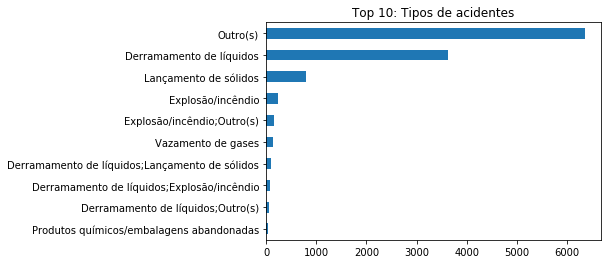

In [55]:
df['tipo_evento'].value_counts(ascending=True).tail(10).plot.barh(title="Top 10: Tipos de acidentes");

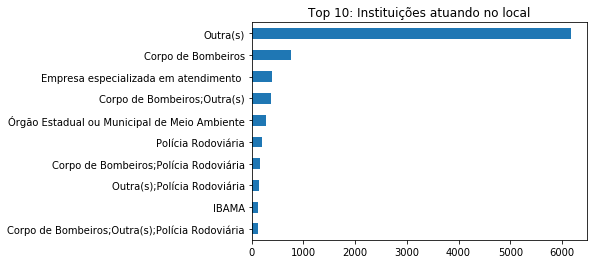

In [58]:
df['institiuicoes_atuando_local'].value_counts(ascending=True).tail(10).plot.barh(title="Top 10: Instituições atuando no local");

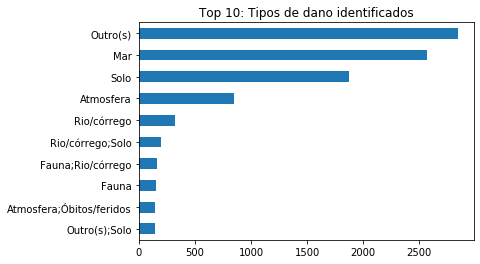

In [59]:
df['tipos_danos_identificados'].value_counts(ascending=True).tail(10).plot.barh(title="Top 10: Tipos de dano identificados");

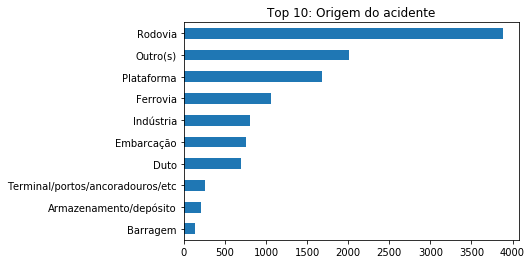

In [60]:
df['origem'].value_counts(ascending=True).tail(10).plot.barh(title="Top 10: Origem do acidente");

In [62]:
!pip install wordcloud

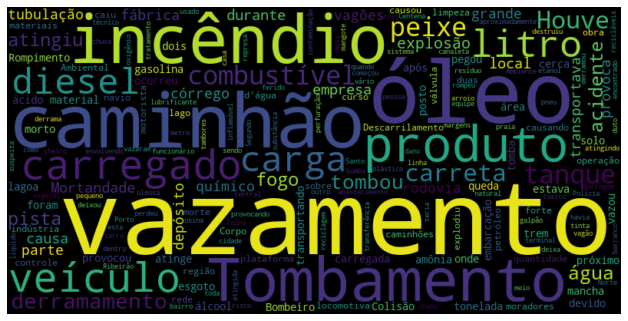

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

todas_desc = ' '.join([str(s) for s in df['des_ocorrencia']])
palavras_retirar = ['para','entre','pela','pelo', 'ainda', 'está','ficou','pode']

wc = WordCloud(min_word_length=4, stopwords=palavras_retirar, collocations=False, width=800, height=400)
wc.generate(todas_desc)

plt.rcParams['figure.figsize'] = (11,7)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off") 
plt.show()

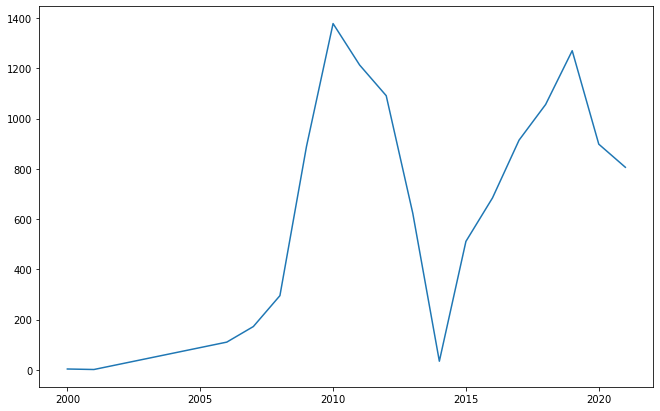

In [123]:
df['ano_registro'].value_counts().sort_index().plot();

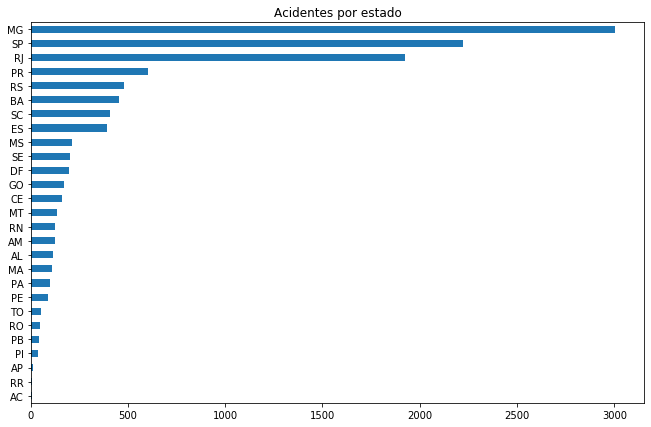

In [126]:
df['uf'].value_counts(ascending=True).plot.barh(title="Acidentes por estado");

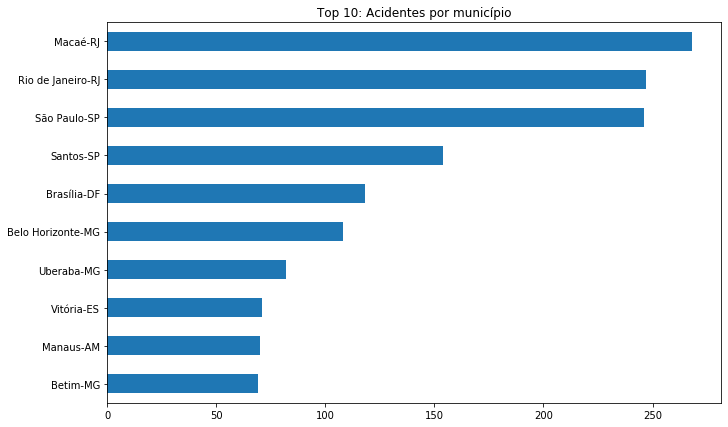

In [149]:
df['municipio-uf'] = df['municipio']+'-'+df['uf']

df['municipio-uf'].value_counts(ascending=True).tail(10).plot.barh(title="Top 10: Acidentes por município");

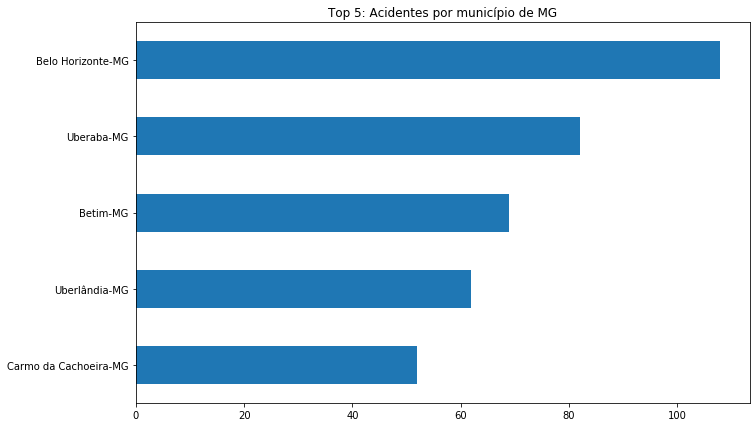

In [153]:
df.query('uf == "MG"')['municipio-uf'].value_counts(ascending=True).tail(5).plot.barh(title="Top 5: Acidentes por município de MG");